In [1]:
import sys
import os
import pandas as pd

sys.path.append(os.path.abspath("../scripts"))
from sentiment_analysis import SentimentAnalyzer


cleaned_reviews = pd.read_csv("../data/cleaned_reviews.csv")

analyzer = SentimentAnalyzer()
def main():
    cleaned_reviews["sentiment"] = cleaned_reviews["review"].apply(analyzer.analyze)
    cleaned_reviews.to_csv("../data/cleaned_reviews_with_sentiment.csv", index=False)
    
main()



c:\Users\segni\Documents\GitHub\banking-app-review-analysis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


In [2]:
cleaned_reviews.head()

,app_id,app_name,user_name,review,rating,thumbs_up_count,date,sentiment
0,com.combanketh.mobilebanking,Combanketh,A Google user,what is this app problem???,1,0,2025-06-05 22:16:56,0.000377
1,com.combanketh.mobilebanking,Combanketh,A Google user,the app is proactive and a good connections.,5,0,2025-06-05 15:55:10,0.999868
2,com.combanketh.mobilebanking,Combanketh,A Google user,I cannot send to cbebirr app. through this app.,3,0,2025-06-05 11:12:49,0.004665
3,com.combanketh.mobilebanking,Combanketh,A Google user,good,4,0,2025-06-05 10:21:59,0.999816
4,com.combanketh.mobilebanking,Combanketh,A Google user,not functional,1,0,2025-06-05 07:38:12,0.000221


In [3]:
cleaned_reviews.isna().sum()

app_id             0
app_name           0
user_name          0
review             0
rating             0
thumbs_up_count    0
date               0
sentiment          0
dtype: int64

### **Aggregate by bank and rating (e.g., mean sentiment for 1-star reviews).**

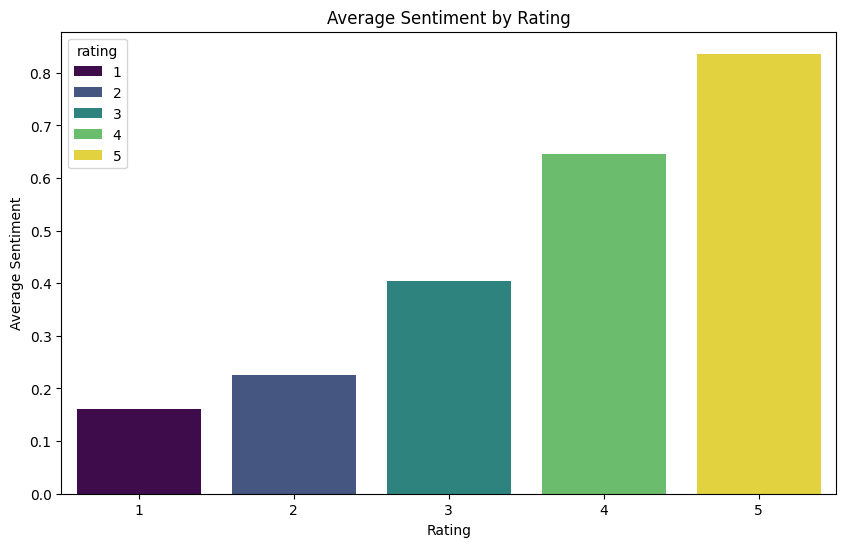

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the sentiment distribution
plt.figure(figsize=(10, 6))
group_by_rating = cleaned_reviews.groupby("rating")["sentiment"].mean().reset_index()
sns.barplot(data=group_by_rating, x="rating", y="sentiment", hue="rating", palette="viridis")
plt.title("Average Sentiment by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Sentiment")

plt.savefig("../reports/figures/sentiment_by_rating.png")
plt.show()

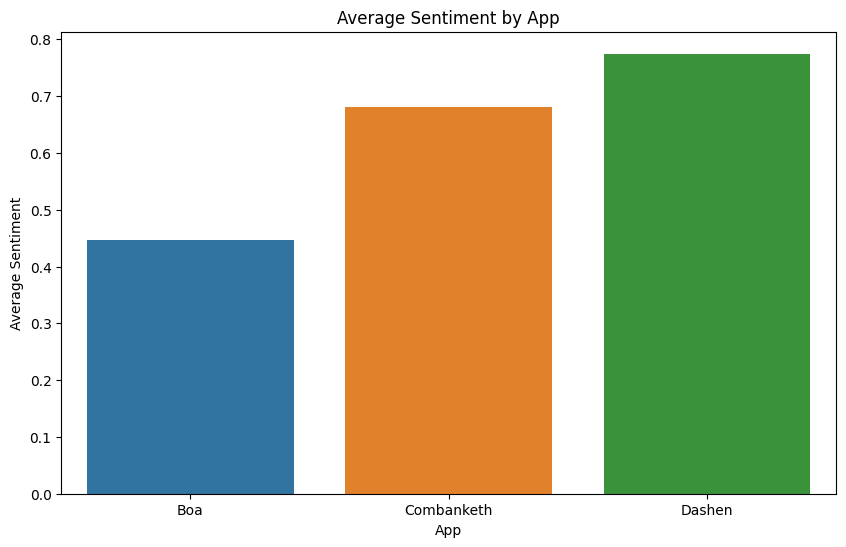

In [12]:
plt.figure(figsize=(10, 6))
group_by_app = cleaned_reviews.groupby("app_name")["sentiment"].mean().reset_index()
sns.barplot(data=group_by_app, x="app_name", y="sentiment", hue="app_name")
plt.title("Average Sentiment by App")
plt.xlabel("App")
plt.ylabel("Average Sentiment")

plt.savefig("../reports/figures/sentiment_by_app.png")
plt.show()

C:\Users\segni\AppData\Local\Temp\ipykernel_31128\1575215534.py:14: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  barplot = sns.barplot(


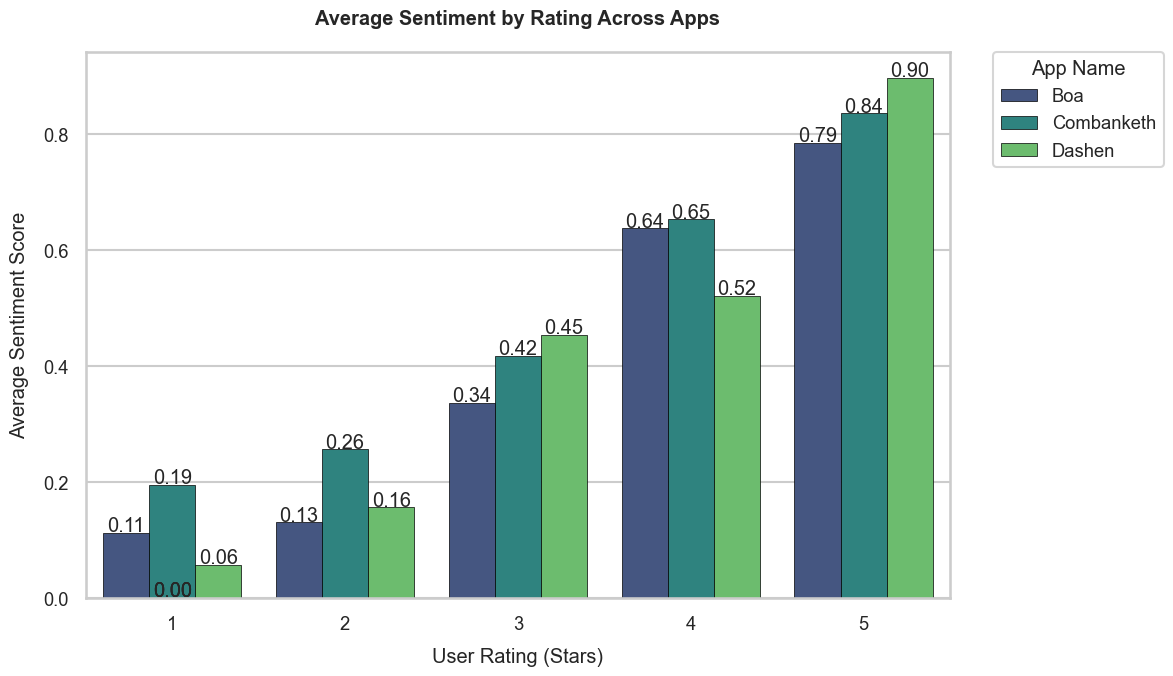

In [ ]:
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

plt.figure(figsize=(12, 7))


group_by_rating_and_app = cleaned_reviews.groupby(["rating", "app_name"])["sentiment"].mean().reset_index()


barplot = sns.barplot(
    data=group_by_rating_and_app,
    x="rating",
    y="sentiment",
    hue="app_name",
    palette="viridis",
    edgecolor="black",
    linewidth=0.5, 
    errwidth=1 
)

plt.title("Average Sentiment by Rating Across Apps", pad=20, fontweight="bold")
plt.xlabel("User Rating (Stars)", labelpad=10)
plt.ylabel("Average Sentiment Score", labelpad=10)


plt.legend(
    title="App Name",
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

for p in barplot.patches:
    barplot.annotate(
        format(p.get_height(), '.2f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.tight_layout()


plt.savefig(
    "../reports/figures/sentiment_by_rating_and_app.png",
    dpi=300,
    bbox_inches="tight",
    transparent=False
)

plt.show()